# Introduction Keras

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [3]:
df=pd.read_csv("fake_reg.csv")

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [5]:
df.shape

(1000, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# df=pd.read_csv('drive/MyDrive/Colab Notebooks/DATA/fake_reg.csv')

In [9]:
df.isnull().sum().any()

False

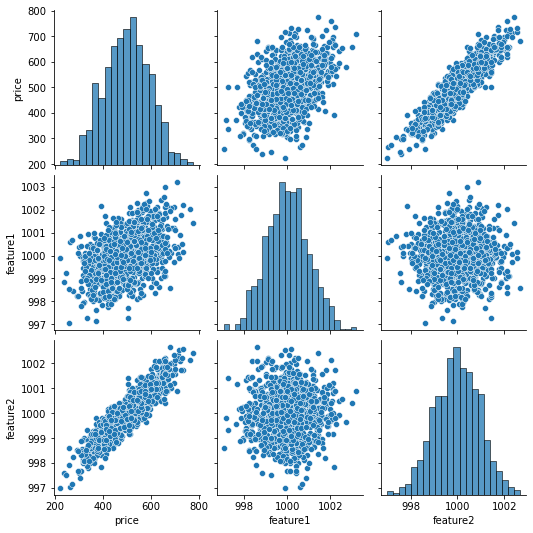

In [11]:
sns.pairplot(df);

In [12]:
df.corr()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


In [13]:
# from sklearn.model_selection import train_test_split

In [14]:
# ML de dataframeden target?label i drop ederek X e atiyorduk. Modele X i df olarak sokuyorduk, Model calisiyordu.
# Ancak Kerasta X ve y array olmali

X = df[["feature1", "feature2"]].values
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [15]:
y=df["price"].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
X_train.shape

(700, 2)

In [18]:
X_train

array([[1001.63407565,  998.80950388],
       [ 999.76150137,  998.41802414],
       [ 998.2638401 , 1000.92030063],
       ...,
       [1000.47386523, 1001.44542815],
       [ 998.8625673 ,  999.15662112],
       [1000.55690247,  999.35441706]])

# scaling data

In [20]:
# from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [21]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [22]:
X_test.min(), X_test.max()

(-0.014108392024496652, 1.0186515935232023)

TensorFlow Syntax
(use %tensorflow_version 1.x to use old versions of tf)

**Dense**: layerin tipidir.  Full connected layers in Kerastaki karsiligi dense tir. Baska layers tipleri : CNN, RNN

**input_dim**: X teki feature sayisini ifade eder. regresyon problemlerinde genelde relu kullanilir.
clasisifcasyonda sigmoid secilir.
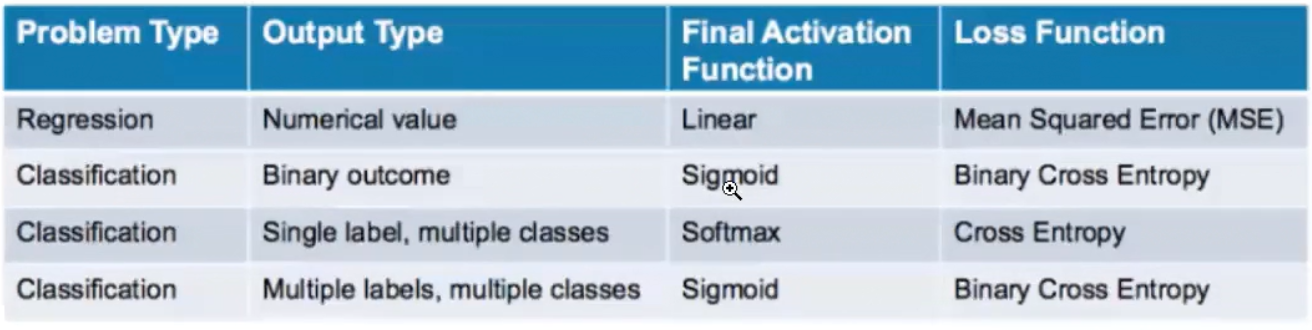

* DL nin outliera sensitivedir. Bu nedenle mutlaka scale edilir.
* Regreyon problemlerinde output layerda 1 noron vardir, aktivasyon fonksiyonu yoktur.
* binary classificationda output layerda nöron sayisi 2 dir. aktivasyon fonk sigmoid tir.
* Multiple classificationda output layerda nöron sayisi idi kac clas varsa o kadardir. aktivasyon fonk softmax tir.
* Input ve hidden layers ta aktivation function olarak genelde relu kullanılır.
* Loss function yukarıdaki tabloya gore seçilir.


In [27]:
model = Sequential()
model.add(Dense(4, # 4: input noron sayisi
                input_dim=X_train.shape[1], # input_dim i hic yazmasakta keras bunu anlayabilir.
                activation="relu"))  

model.add(Dense(4, activation="relu"))  # genelde 2. ve 3. hidden layer eklenir.
model.add(Dense(2, activation="relu"))
model.add(Dense(1)) 
# regreyon oldugu icin 1, aktivasyon fonk yazilmaz.
# binary classification olsa idi 2 olurdu. aktivasyon fonk sigmoid yazilirdi.
# Multiple classification olsa idi kac clas varsa o yazilirdi. aktivasyon fonk softmax yazilirdi.
model.compile(optimizer="adam", loss="mse") 
# normalde ilk once optimizer olarak adam denenir.

Istenirse asagidaki gibi optimizer icinde learning rate ayarlanip oyle compile edilebilir. Gradient desent, Backpropagation, learning rate hepsi optimizerin icindedir.

    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=opt)

In [33]:
X_train.shape[0]/16
# batch_size:16 verirsek 44 iterasyonda train islemini yapar.
# batch_size defaultta 32 dir.

43.75

In [30]:
model.fit(X_train, y_train, batch_size=16, epochs=250)

Epoch 1/250
44/44 [==============================] - 0s 989us/step - loss: 1232.2115
Epoch 2/250
44/44 [==============================] - 0s 1ms/step - loss: 1219.4589
Epoch 3/250
44/44 [==============================] - 0s 1ms/step - loss: 1205.7849
Epoch 4/250
44/44 [==============================] - 0s 1ms/step - loss: 1192.3033
Epoch 5/250
44/44 [==============================] - 0s 1ms/step - loss: 1179.4220
Epoch 6/250
44/44 [==============================] - 0s 1ms/step - loss: 1166.5798
Epoch 7/250
44/44 [==============================] - 0s 1ms/step - loss: 1152.1765
Epoch 8/250
44/44 [==============================] - 0s 1ms/step - loss: 1138.5540
Epoch 9/250
44/44 [==============================] - 0s 1ms/step - loss: 1123.7886
Epoch 10/250
44/44 [==============================] - 0s 1ms/step - loss: 1110.3131
Epoch 11/250
44/44 [==============================] - 0s 1ms/step - loss: 1096.6741
Epoch 12/250
44/44 [==============================] - 0s 1ms/step - loss: 1082.0109

44/44 [==============================] - 0s 1ms/step - loss: 106.6834
Epoch 100/250
44/44 [==============================] - 0s 1ms/step - loss: 101.7222
Epoch 101/250
44/44 [==============================] - 0s 1ms/step - loss: 97.2430
Epoch 102/250
44/44 [==============================] - 0s 1ms/step - loss: 93.5221
Epoch 103/250
44/44 [==============================] - 0s 1ms/step - loss: 89.0978
Epoch 104/250
44/44 [==============================] - 0s 1ms/step - loss: 85.1426
Epoch 105/250
44/44 [==============================] - 0s 1ms/step - loss: 81.5329
Epoch 106/250
44/44 [==============================] - 0s 1ms/step - loss: 77.9991
Epoch 107/250
44/44 [==============================] - 0s 1ms/step - loss: 74.7899
Epoch 108/250
44/44 [==============================] - 0s 1ms/step - loss: 71.4409
Epoch 109/250
44/44 [==============================] - 0s 1ms/step - loss: 68.3225
Epoch 110/250
44/44 [==============================] - 0s 1ms/step - loss: 65.6043
Epoch 111/250
44

44/44 [==============================] - 0s 1ms/step - loss: 23.8334
Epoch 198/250
44/44 [==============================] - 0s 1ms/step - loss: 24.1064
Epoch 199/250
44/44 [==============================] - 0s 1ms/step - loss: 24.1970
Epoch 200/250
44/44 [==============================] - 0s 1ms/step - loss: 24.1796
Epoch 201/250
44/44 [==============================] - 0s 1ms/step - loss: 23.9071
Epoch 202/250
44/44 [==============================] - 0s 1ms/step - loss: 23.9524
Epoch 203/250
44/44 [==============================] - 0s 1ms/step - loss: 24.3502
Epoch 204/250
44/44 [==============================] - 0s 1ms/step - loss: 24.0226
Epoch 205/250
44/44 [==============================] - 0s 1ms/step - loss: 24.3534
Epoch 206/250
44/44 [==============================] - 0s 1ms/step - loss: 24.0394
Epoch 207/250
44/44 [==============================] - 0s 1ms/step - loss: 23.8068
Epoch 208/250
44/44 [==============================] - 0s 1ms/step - loss: 24.0746
Epoch 209/250
44/4

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


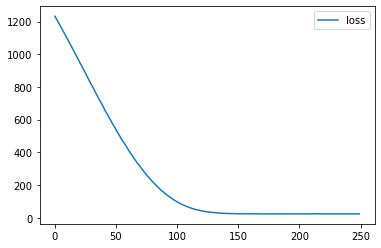

In [35]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot();

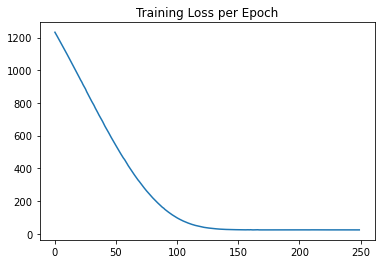

In [37]:
# Alternative with seaborn
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [ ]:
loss_df.loss.idxmin() 

249

In [39]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [40]:
y_pred = model.predict(X_test)

In [41]:
eval_metrics(y_test, y_pred)

r2_score: 0.997160724107519 
 mae: 3.9995525859686465 
 mse: 24.963003553536026 
 rmse: 4.996298985602846


In [44]:
y_test.shape, y_pred.shape

((300,), (300, 1))

In [45]:
my_dict={"Actual":y_test, "Pred":y_pred.reshape(300,)}
compare=pd.DataFrame(my_dict)

In [46]:
compare.sample(5)

,Actual,Pred
127,516.286038,512.012512
74,453.458298,453.466888
43,449.026070,445.697968
164,530.001044,535.022888
102,342.059066,333.873962
